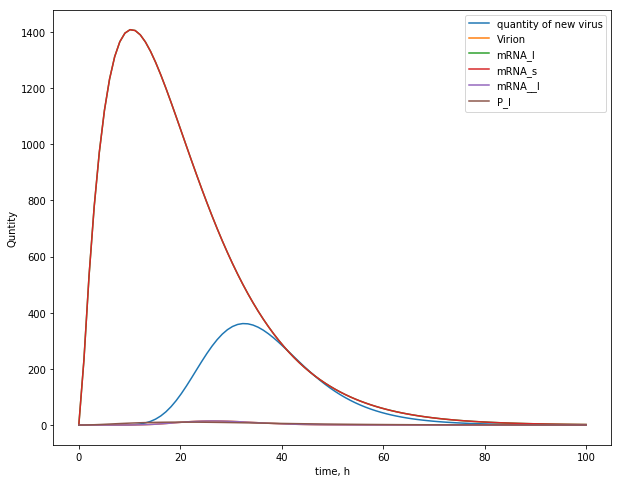

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.ion()
plt.rcParams['figure.figsize'] = 10, 8


k_bound = 20
d_virus = 0.2
k_fuse = 0.1
d_bound = 3
k_end = 30
k_tr = 0.4
d_p_degr = 0.1
d_RNA = 0.1
k_transl = 0.001
d_proteins = 0.396
k_repl = 100
k_GP = 1.4
d_gp = 0.04
d_GP1 = 0.02
k_comb = 0.0005
d_comb = 1000
k_bud = 4
d_bud = 0.12

def f(y,t):
    V_free = y[0]
    V_bound = y[1]
    mRNA__l = y[2]
    mRNA__s = y[3]
    mRNA_l = y[4]
    mRNA_s = y[5]
    P_l = y[6]
    P_z = y[7]
    P_np = y[8]
    P_gp = y[9]
    P_gp1 = y[10]
    P_gp2 = y[11]
    V_virion = y[12]
    V_bud = y[13]
    f0 = -k_bound * V_free - d_virus*V_free
    f1 = k_bound * V_free - (k_fuse+d_bound)* V_bound
    f2 = k_end * V_bound - d_RNA * mRNA__l
    f3 = k_end * V_bound - d_RNA * mRNA__s
    f4 = mRNA__l * k_tr - d_RNA * mRNA_l
    f5 = mRNA__l * k_tr - d_RNA * mRNA_s
    f6 = k_transl * mRNA_l - d_p_degr * P_l
    f7 = k_transl * mRNA_l - d_p_degr * P_z
    f8 = k_transl * mRNA_s - d_p_degr * P_gp
    f9 = k_transl * mRNA_s - d_p_degr * P_np
    f10 = k_GP * P_gp - d_gp * P_gp1
    f11 = k_GP * P_gp - d_gp * P_gp2
    f12 = k_comb * P_gp1*P_gp2*P_l*P_z*P_np - (k_bud + d_comb)* V_virion
    f13 = k_bud * V_virion - d_bud * V_bud
    return [f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13]
  #  return f0

V_free0 = 100
V_bound0 = 0
mRNA__l0 = 0
mRNA__s0 = 0
mRNA_l0 = 0
mRNA_s0 = 0
P_l0 = 0
P_z0 = 0
P_gp0 = 0
P_np0 = 0
P_gp10 = 0
P_gp20 = 0
V_virion0 = 0
V_bud0 = 0
y0 = [V_free0,V_bound0,mRNA__l0,mRNA__s0,mRNA_l0,mRNA_s0,P_l0,P_z0,P_gp0,P_np0,P_gp10,P_gp20,V_virion0,V_bud0]
#y0 = [V_free0]

t  = np.linspace(0, 100., 100)    

res = odeint(f, y0, t)

V_free = res[:, 0]
V_bound = res[:, 1]
mRNA__l = res[:, 2]
mRNA__s = res[:, 3]
mRNA_l = res[:, 4]
mRNA_s = res[:, 5]
P_l = res[:, 6]
P_z = res[:, 7]
P_np = res[:, 8]
P_gp = res[:, 9]
P_gp1 = res[:, 10]
P_gp2 = res[:,11]
V_virion = res[:, 12]
V_bud = res[:, 13]

plt.figure()
plt.plot(t, V_bud, label='quantity of new virus')
plt.plot(t, V_virion, label='Virion')
plt.plot(t, mRNA_l, label='mRNA_l')
plt.plot(t, mRNA_l, label='mRNA_s')
plt.plot(t, V_virion, label='mRNA__l')
plt.plot(t, P_l, label='P_l')
plt.xlabel('time, h')
plt.ylabel('Quntity')
plt.title('')
plt.legend(loc=0)


In [ ]:
sc.optimize?